# 1. Import the required libraries

In [2]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats  
from sklearn.model_selection import train_test_split
from sklearn import datasets 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing(as_frame=True)

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

%matplotlib notebook
%matplotlib inline

# 2. Load the Housing Dataset

In [3]:
X = california_housing.data
y = california_housing.target
descr = california_housing["DESCR"]
feature_names = california_housing["feature_names"]
number_of_features = X.shape[1]
number_of_targets = y.shape[-1]
data = california_housing["data"]
target = california_housing["target"]
df1 = pd.DataFrame(data=data)
df1.rename(columns={0: feature_names[0], 1: feature_names[1], 2: feature_names[2], 3: feature_names[3],
 4: feature_names[4], 5: feature_names[5], 6: feature_names[6], 7: feature_names[7]}, inplace=True)
df2 = pd.DataFrame(data=target)
df2.rename(columns={0: "Target"}, inplace=True)
housing = pd.concat([df1, df2], axis=1)
display(housing.head())

print("\nNumber of features is: ", number_of_features)
print("Number of targets is: ", number_of_targets)
print("Number of instances is: ", X.shape[0])


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422



Number of features is:  8
Number of targets is:  20640
Number of instances is:  20640


# 3. Visualizations

### 3.1 Feature and Target Variable Histograms

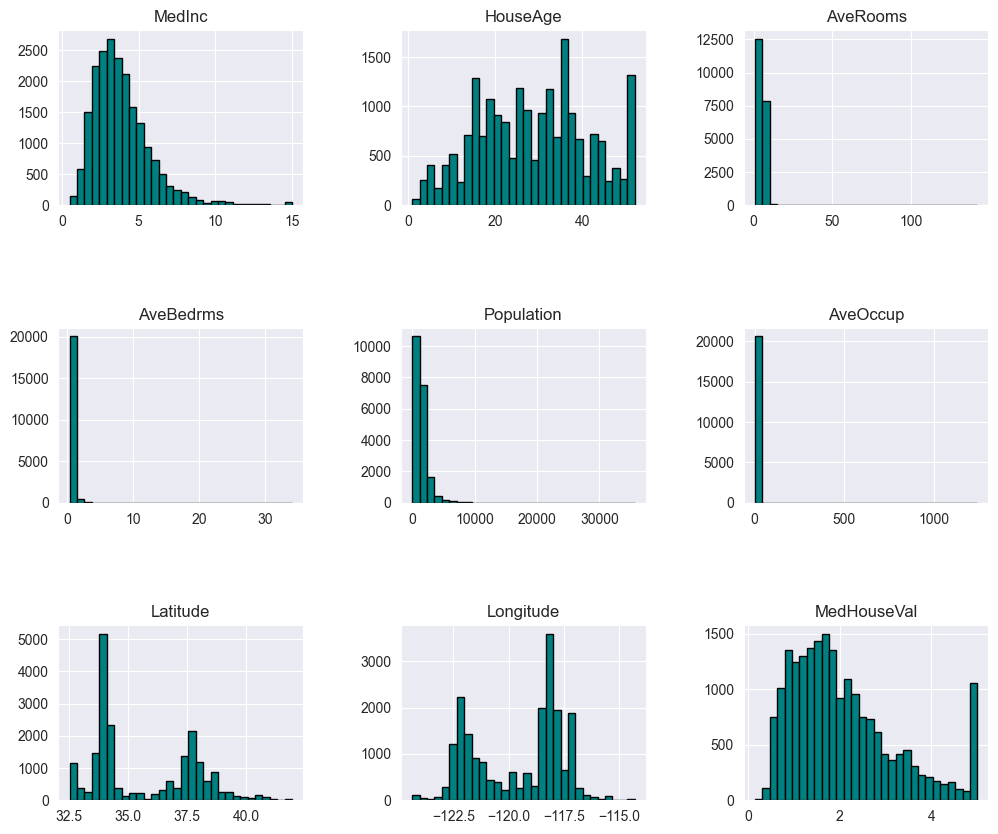

In [4]:
california_housing.frame.hist(figsize=(12, 10), bins=30, edgecolor="black", color = 'teal')
plt.subplots_adjust(hspace=0.7, wspace=0.4)


Visualising Median house value using scatterplot based on Longitude and Latitude

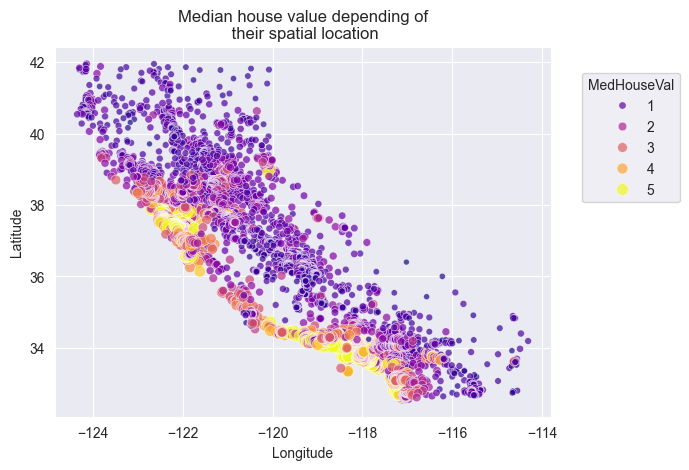

In [5]:
sns.scatterplot(data=california_housing.frame, x="Longitude", y="Latitude",
                size="MedHouseVal", hue="MedHouseVal",
                palette="plasma", alpha=0.7)
plt.legend(title="MedHouseVal", bbox_to_anchor=(1.05, 0.95),
           loc="upper left")
_ = plt.title("Median house value depending of\n their spatial location")

It is interesting to notice that all datapoints show a graphical representation of this state. We note that the high-valued houses will be located on the coast, where the big cities from California are located: San Diego, Los Angeles, San Jose, or San Francisco.

### 3.2 Feature with feature scatterplots. 

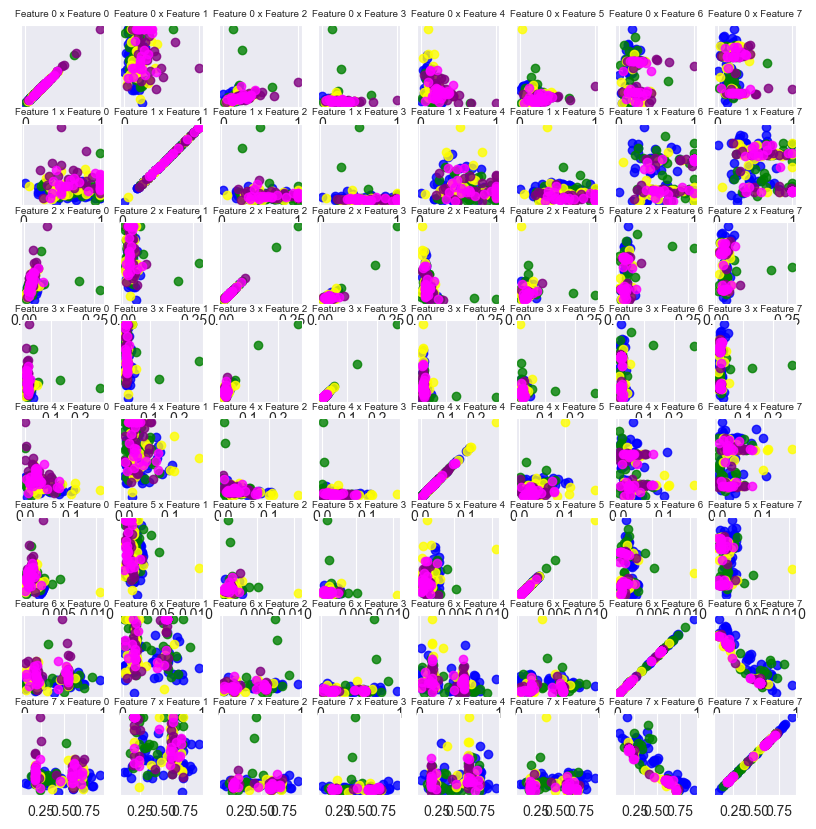

In [6]:
colors=["red", "blue", "green", "yellow", "purple", "magenta", "orange", "teal"]
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=number_of_features, ncols=number_of_features)
for feat_i in range(number_of_features):
    for feat_j in range(number_of_features):
        ax = plt.subplot(number_of_features,number_of_features,number_of_features*feat_i + feat_j+1)
        for class_i in range(number_of_features):
            color = colors[class_i]
            mask = y == class_i
            plt.scatter(X[mask, feat_i], X[mask, feat_j], alpha=.8, color=color)
        plt.yticks(())
        plt.title("Feature "+str(feat_i)+" x Feature "+str(feat_j), fontsize=7)
plt.show()

### 3.4 Feature with Target KDE joint plots. 

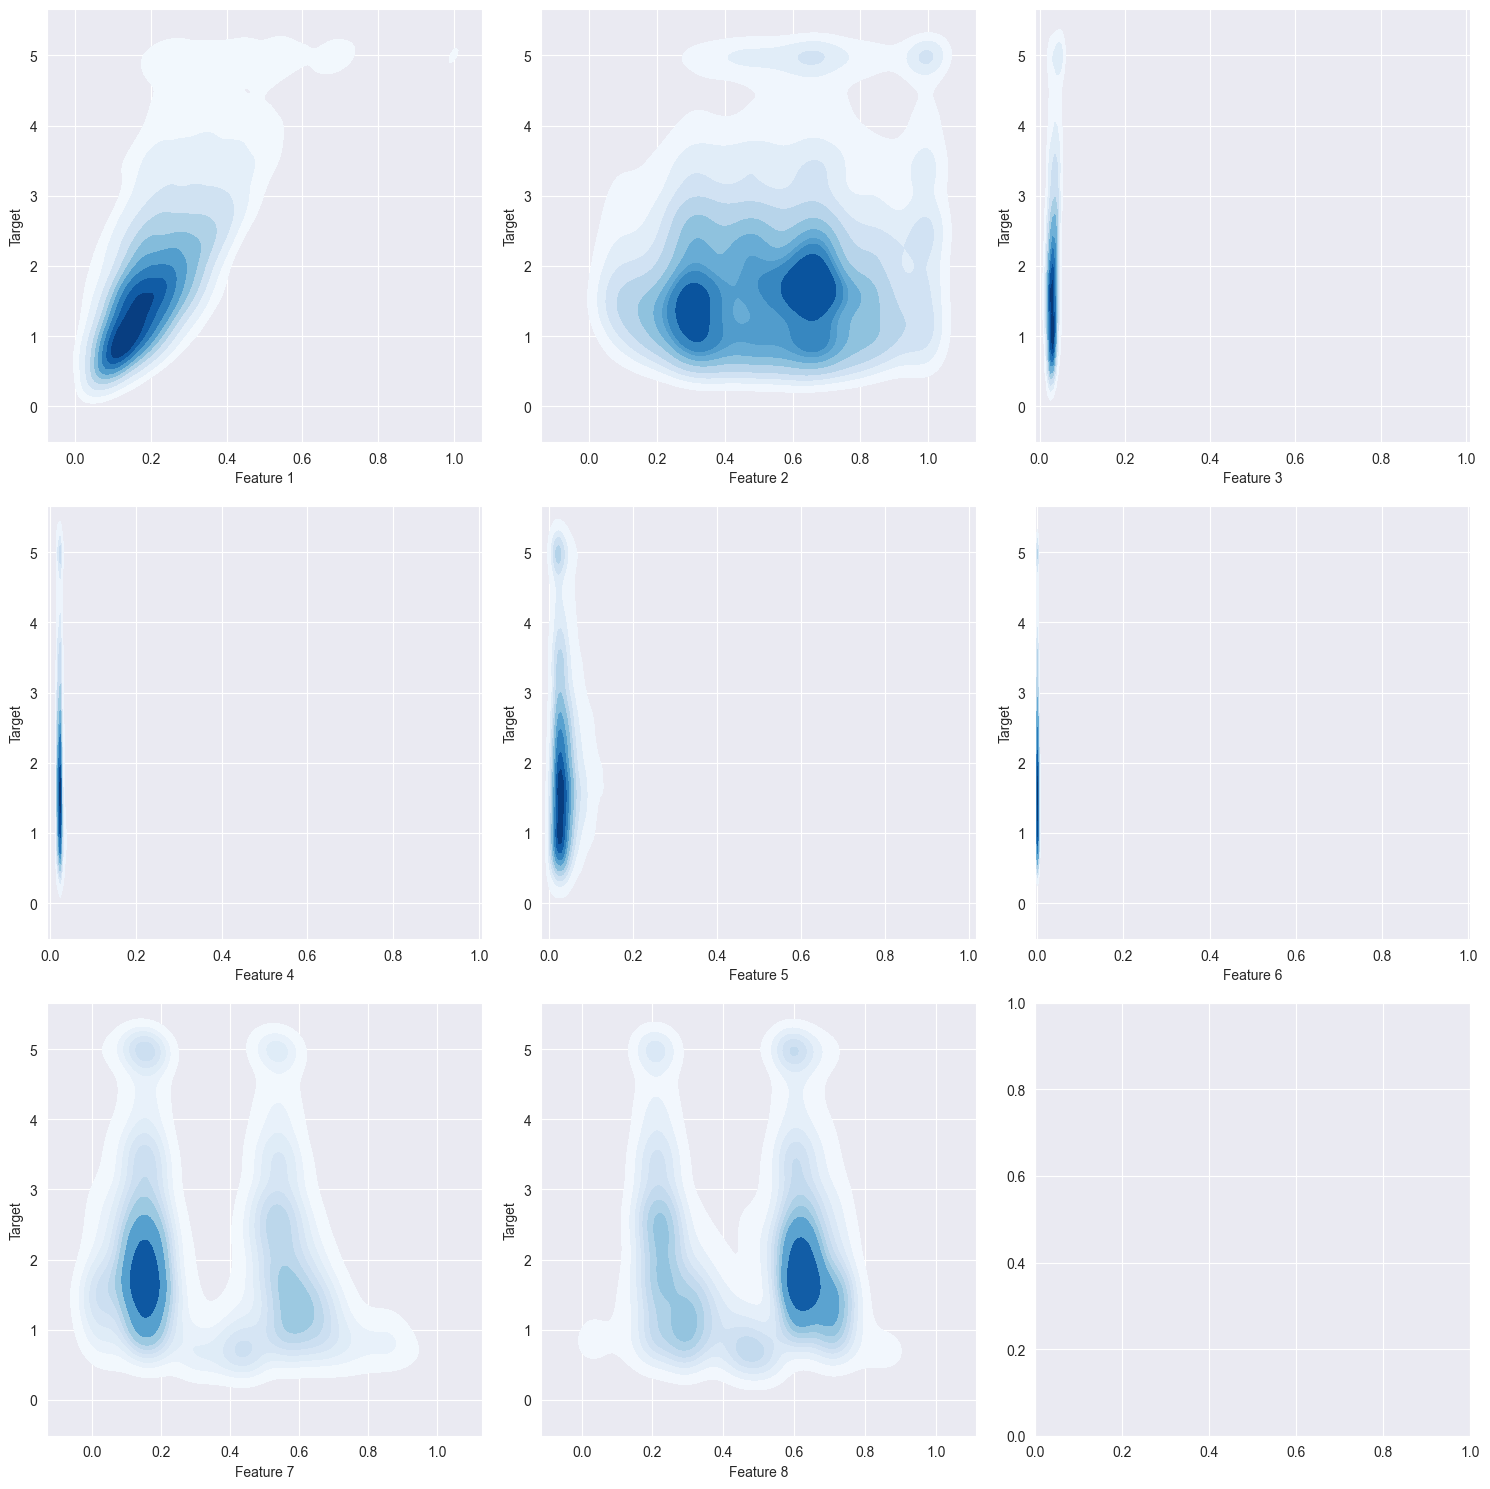

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))

# Flatten the axes array for easier iteration
axes = axes.flatten()

for feat_i in range(number_of_features):
    sns.kdeplot(x=X[:, feat_i], y=y, ax=axes[feat_i], cmap="Blues", fill=True)
    axes[feat_i].set_xlabel(f'Feature {feat_i + 1}')
    axes[feat_i].set_ylabel('Target')


# Adjust layout
plt.tight_layout()
plt.show()

3.5 Feature with Target regular joint plots.

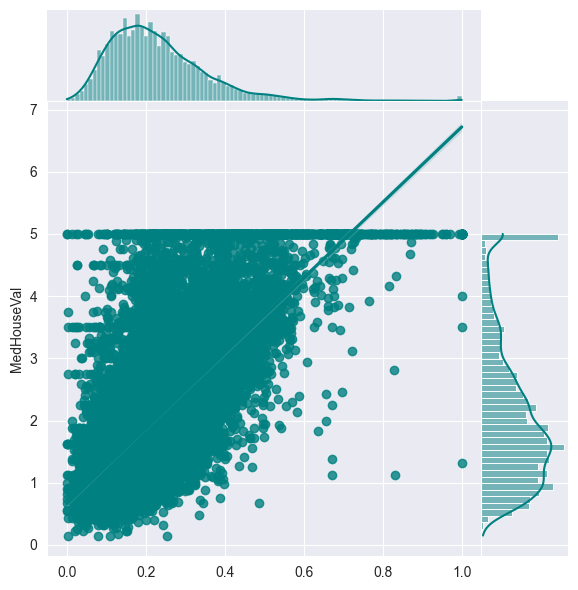

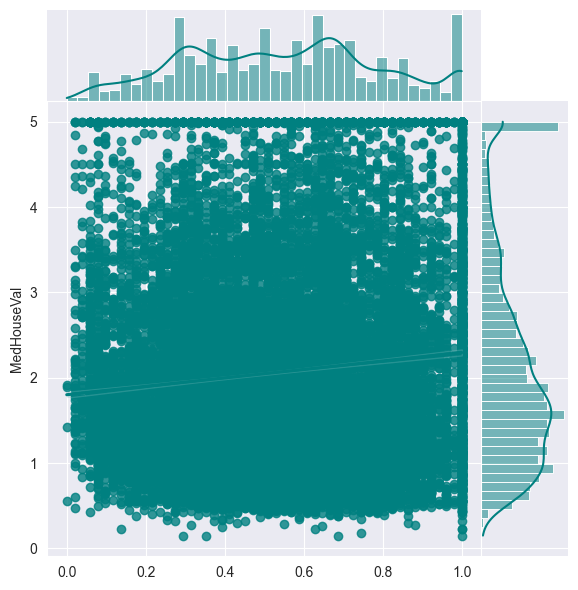

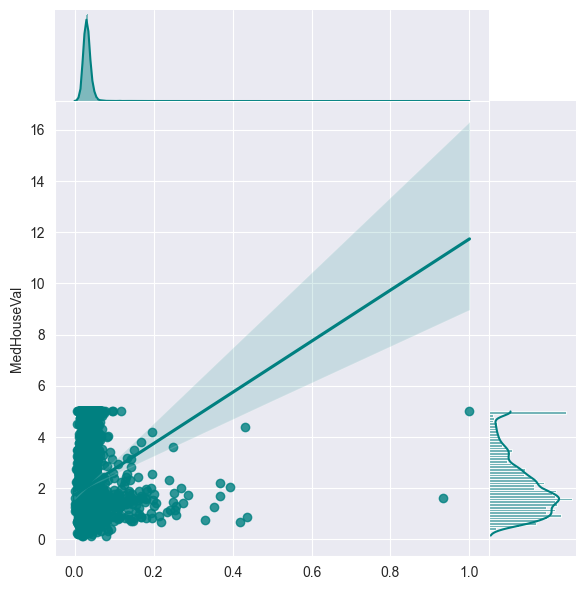

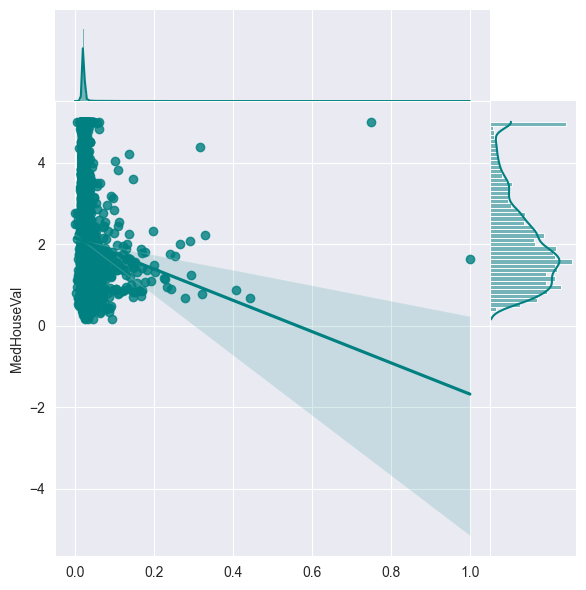

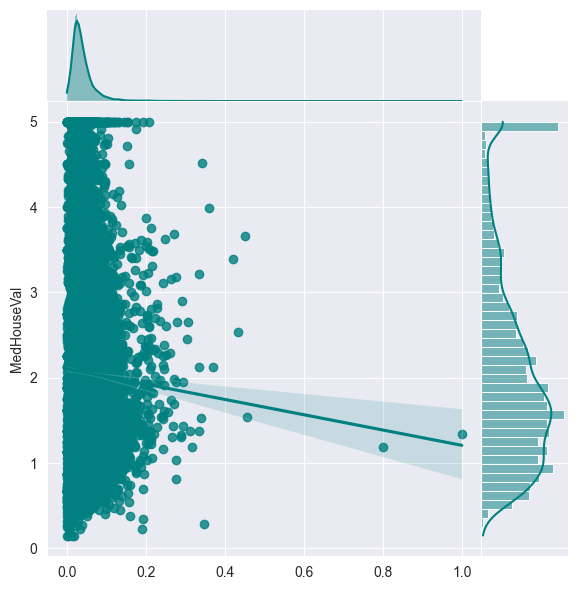

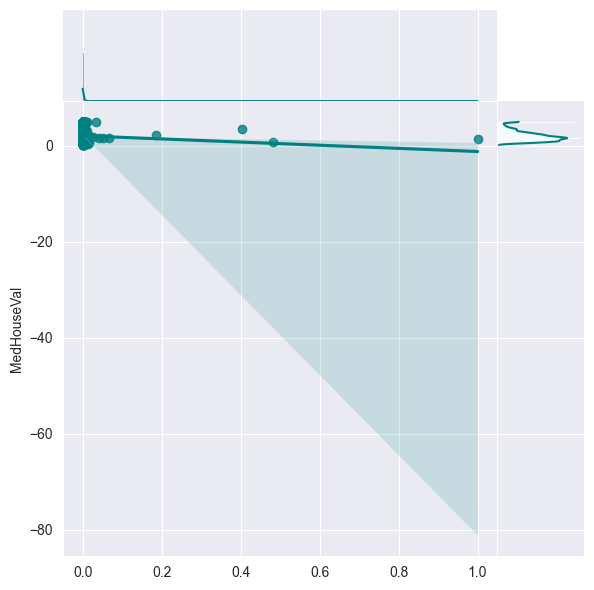

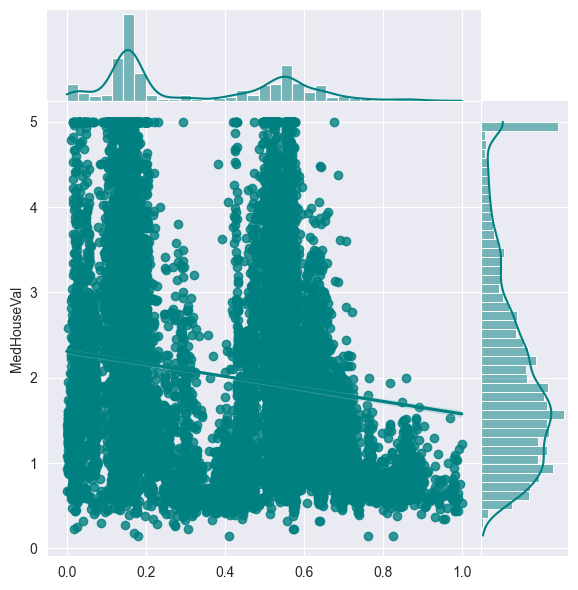

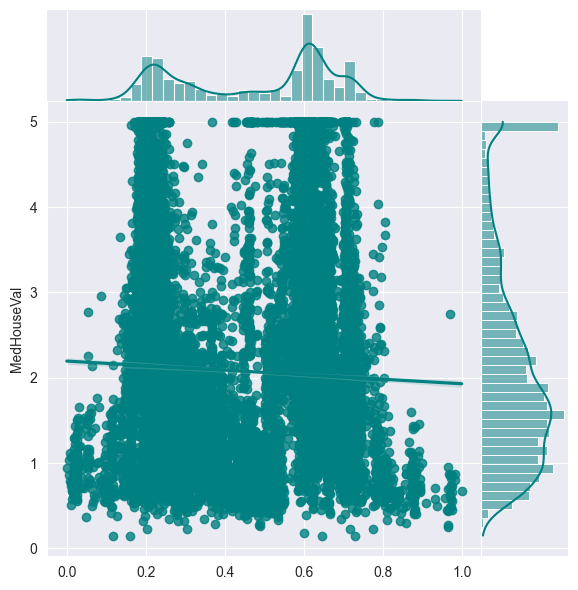

In [8]:
for feat_i in range(number_of_features):
    sns.jointplot(x=X[:,feat_i], y=y, kind="reg", space=0, color="teal")
plt.show()

# 4. Data preprocessing - Min Max Normalization of the data

In [9]:
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(housing.loc[:, housing.columns != 'MedHouseVal'], housing['MedHouseVal'], random_state=42)
print(len(train_set), "Train Instances +", len(test_set), "Test Instances")

16512 Train Instances + 4128 Test Instances


# 5. Regression

### 5.1 Regression using the standard Linear Regression model


In [10]:
reg = LinearRegression().fit(X_train, y_train)
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_ )
y_pred = reg.predict(X_test)
print("Mean squared error")
print(mean_squared_error(y_test, y_pred))
print("Mean absolute error")
print(mean_absolute_error(y_test, y_pred))

Coefficients W
[ 4.47600069e-01  9.56752596e-03 -1.24755956e-01  7.94471254e-01
 -1.43902596e-06 -3.44307993e-03 -4.18555257e-01 -4.33405135e-01]
Intercept W0
-37.027827585269385
Mean squared error
0.5411287478470689
Mean absolute error
0.5296964012919457


### 5.2 Regression using the RidgeCV Regression model



In [11]:
from sklearn.linear_model import RidgeCV
reg = RidgeCV(alphas=1).fit(X_train, y_train)
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_ )
y_pred = reg.predict(X_test)
print("Mean squared error")
print(mean_squared_error(y_test, y_pred))
print("Mean absolute error")
print(mean_absolute_error(y_test, y_pred))


Coefficients W
[ 4.47422584e-01  9.56940401e-03 -1.24420508e-01  7.92596292e-01
 -1.43624493e-06 -3.44256216e-03 -4.18552106e-01 -4.33378310e-01]
Intercept W0
-37.0238696473014
Mean squared error
0.5410468622662505
Mean absolute error
0.5297012459358538


### 5.3 Regression using the LassoCV Regression model
    


In [12]:
from sklearn.linear_model import LassoCV
reg = LassoCV(cv=5, random_state=0).fit(X_train, y_train)
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_ )
y_pred = reg.predict(X_test)
print("Mean squared error")
print(mean_squared_error(y_test, y_pred))
print("Mean absolute error")
print(mean_absolute_error(y_test, y_pred))

Coefficients W
[ 3.82143676e-01  1.13391151e-02  3.09631850e-03  0.00000000e+00
  2.72055669e-06 -3.14905363e-03 -3.31141458e-01 -3.31497016e-01]
Intercept W0
-27.584453349092
Mean squared error
0.5443761846644304
Mean absolute error
0.5435986979955928


### 5.4 Regression using the ElasticNetCv

In [14]:
from sklearn.linear_model import ElasticNetCV
reg = ElasticNetCV(cv=5, random_state=0).fit(X_train, y_train)

# Print the coefficients and intercept
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_)

# Predict on the test set
y_pred = reg.predict(X_test)

### 5.4 Regression using the ElasticNetCv# Print the evaluation metrics
print("Mean squared error")
print(mean_squared_error(y_test, y_pred))
print("Mean absolute error")
print(mean_absolute_error(y_test, y_pred))

Coefficients W
[ 3.83621121e-01  1.19149906e-02  7.57199907e-04  0.00000000e+00
  4.80307687e-06 -3.21342590e-03 -2.96390703e-01 -2.94548204e-01]
Intercept W0
-24.416982829488077
Mean squared error
0.5500116779786902
Mean absolute error
0.5466539293381888


### 5.4 Regression using the BayesianRIdge

In [16]:
### 5.4 Regression using the ElasticNetCvfrom sklearn.linear_model import BayesianRidge
reg = BayesianRidge().fit(X_train, y_train)

# Print the coefficients and intercept
print("Coefficients W")
print(reg.coef_)
print("Intercept W0")
print(reg.intercept_)

# Predict on the test set
y_pred = reg.predict(X_test)

# Print the evaluation metrics
print("Mean squared error")
print(mean_squared_error(y_test, y_pred))
print("Mean absolute error")
print(mean_absolute_error(y_test, y_pred))

Coefficients W
[ 4.46987801e-01  9.57403943e-03 -1.23598607e-01  7.88001474e-01
 -1.42384095e-06 -3.44129726e-03 -4.18542432e-01 -4.33310496e-01]
Intercept W0
-37.01400064093626
Mean squared error
0.5408476251390791
Mean absolute error
0.529713576134727


After looking at all the different Mean Squared Errors from our different regression models, we can see that the difference between the numbers we're getting is extremely minimal.
As we know a smaller MSE difference between these regression models means that our models are better at making predictions based on our dataset.